##### Importing important libraries to proceed 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.rcParams['figure.figsize'] = (15,10)


import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing the data 

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.shape

(918, 12)

In [5]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
#### Lets split the numerical columns and categorial columns 

In [10]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
numerical_columns = list(data.describe().columns)

In [12]:
categorical_columns = list(set(data.columns.difference(numerical_columns)))

In [13]:
data[numerical_columns]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [14]:
### Lets find the discrete_variables and continues_variable 

In [15]:
data[numerical_columns].dtypes

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object

In [16]:
discrete_variable = [] 
continues_variable = []


for i in data.columns:
    if data[i].dtype == 'int64':
        discrete_variable.append(i)
        
    elif data[i].dtype == 'float64':
        continues_variable.append(i)
    

In [17]:
discrete_variable

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']

In [18]:
continues_variable

['Oldpeak']

In [19]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [20]:
### Lets visualize and see whether the data has outliers or not 

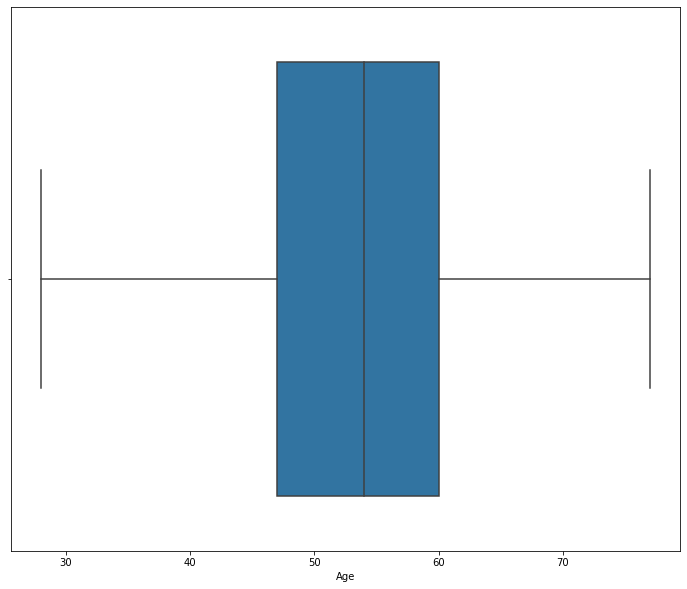

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data,x='Age')
plt.show()

In [22]:
print('The columns in our Heart disease prediction dataset: ',data.columns)
print('*'*100)
print(' '*100)

print('Numerical columns in heart disease prediction dataset: ',data[numerical_columns].columns)
print('*'*100)
print(' '*100)

print('discrete_columns in Heart disease prediction dataset',data[discrete_variable].columns)
print('*'*100)
print(' '*100)

print('continues columns in heart disease prediction dataset ',data[continues_variable].columns)
print('*'*100)
print(' '*100)

print('categorical columns in heart disease prediction dataset ',data[categorical_columns].columns)

The columns in our Heart disease prediction dataset:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
****************************************************************************************************
                                                                                                    
Numerical columns in heart disease prediction dataset:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
****************************************************************************************************
                                                                                                    
discrete_columns in Heart disease prediction dataset Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')
******

In [23]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

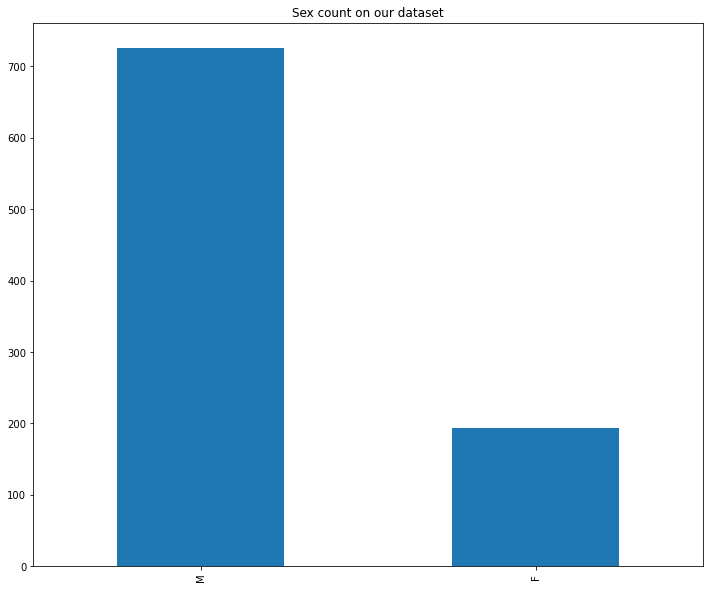

In [24]:
plt.figure(figsize=(12,10))
data['Sex'].value_counts().plot.bar()
plt.title('Sex count on our dataset')
plt.show()

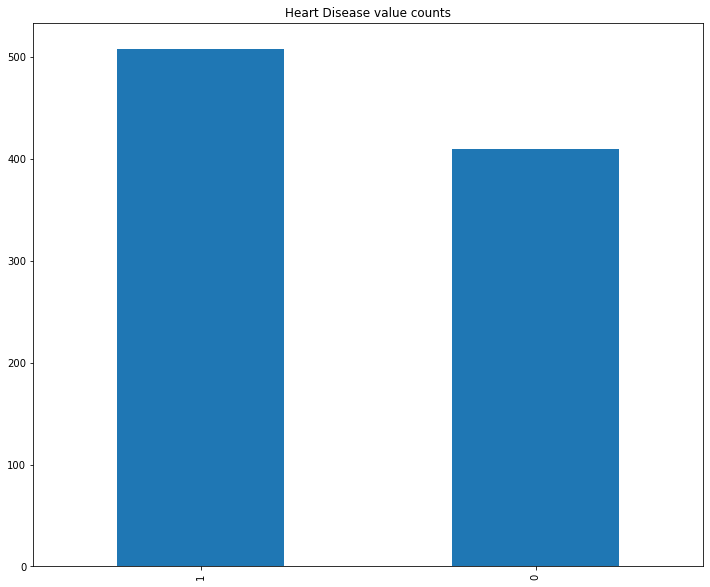

In [25]:
plt.figure(figsize=(12,10))
data['HeartDisease'].value_counts().plot.bar()
plt.title('Heart Disease value counts')
plt.show()

In [26]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [27]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

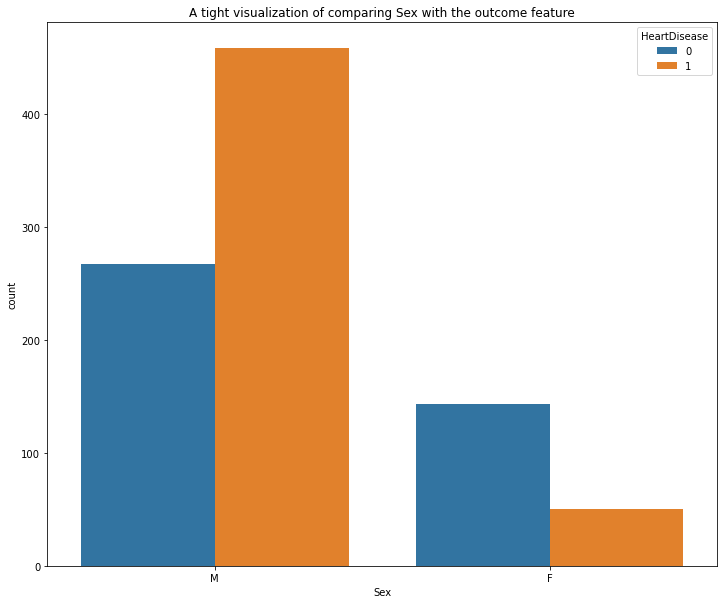

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='Sex',hue='HeartDisease')
plt.title('A tight visualization of comparing Sex with the outcome feature')
plt.show()

In [29]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [30]:
data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [31]:
### Lets bin the age group 

In [32]:
data['Age_bins'] = pd.cut(data['Age'],bins=[20,30,40,50,60,70,80],labels=['20-30','31-40','41-50','51-60','61-70','71-80'])

In [33]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bins
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,31-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,31-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60


In [34]:
### Count_plot 


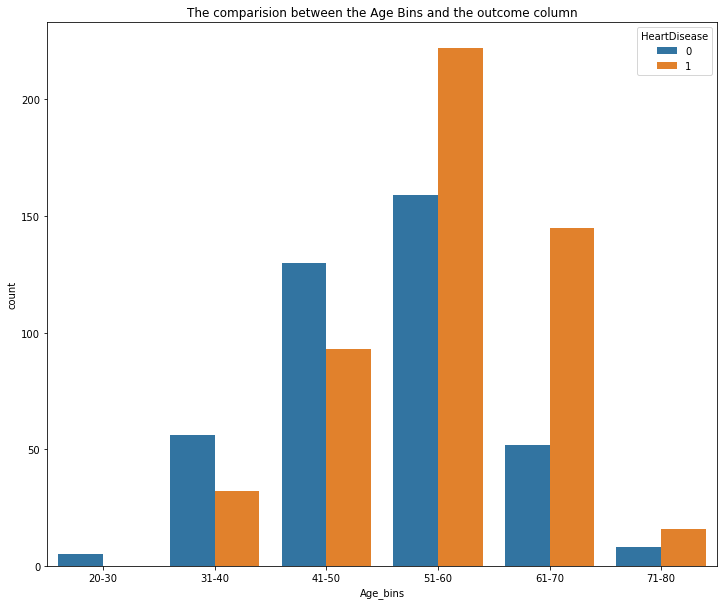

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='Age_bins',hue='HeartDisease')
plt.title('The comparision between the Age Bins and the outcome column')
plt.show()

##### Spark!!!

In [36]:
### Lets use age bins, Sex and Heart disease in group by function to know more about the relationship 

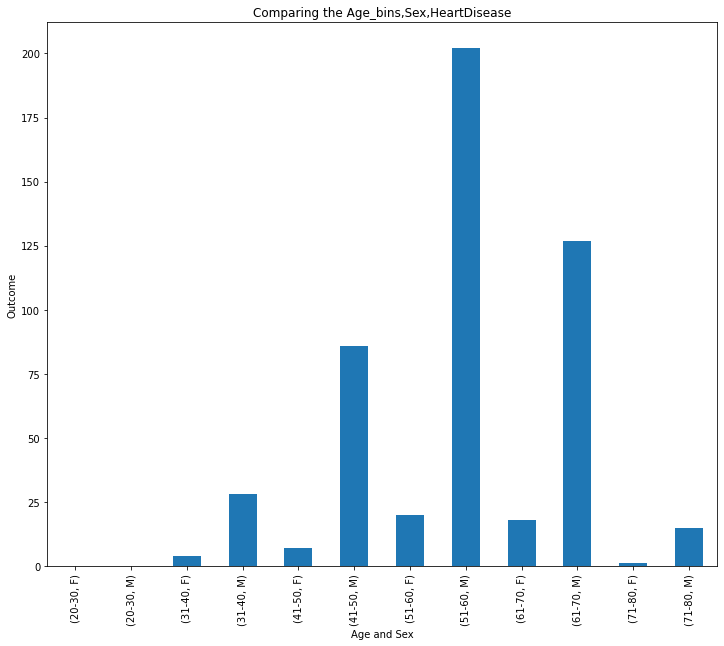

In [37]:
plt.figure(figsize=(12,10))
data.groupby(['Age_bins','Sex'])['HeartDisease'].sum().plot.bar()
plt.title('Comparing the Age_bins,Sex,HeartDisease')
plt.xlabel('Age and Sex')
plt.ylabel('Outcome')
plt.show()

In [38]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins'],
      dtype='object')

###### Chest pain type analysis

In [39]:
## Lets find the value_counts 

In [40]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

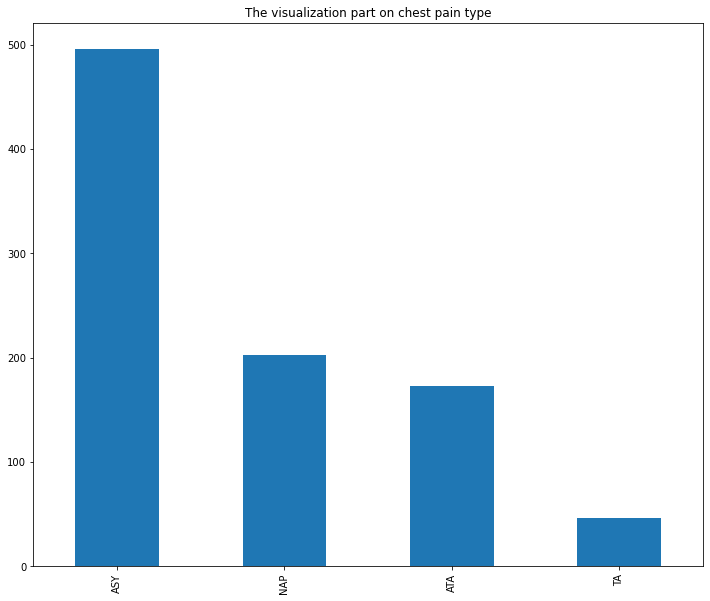

In [41]:
plt.figure(figsize=(12,10))
data['ChestPainType'].value_counts().plot.bar()
plt.title('The visualization part on chest pain type')
plt.show()

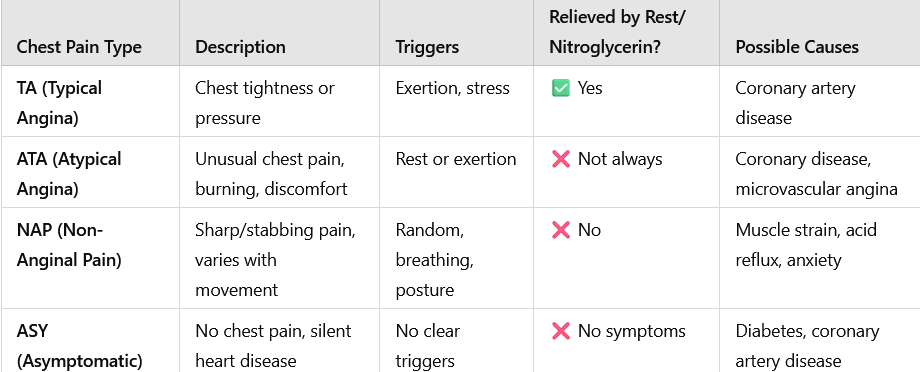

In [42]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins'],
      dtype='object')

In [43]:
### Lets encode the ChestPainType for better 

In [44]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

#### Chest pain type :   0 - ## ASY -- Asymptomatic,  1 ## NAP -- Non-Anginal Pain  #2ATA -- Atypical Angina 3 TA -- Typical Angina

In [45]:
Chest_pain_Encoded = []

for i in data['ChestPainType']:
    if i == 'ASY':
        Chest_pain_Encoded.append('0')
    elif i == 'NAP':
        Chest_pain_Encoded.append('1')
    elif i == 'ATA':
        Chest_pain_Encoded.append('2')
    else:
        Chest_pain_Encoded.append('3')

In [46]:
data['Chest_pain_Encoded'] = Chest_pain_Encoded

In [47]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bins,Chest_pain_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,31-40,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,31-40,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60,1


In [48]:
print('Encoded_value_counts',data['Chest_pain_Encoded'].value_counts())
print(' '*200)

print('*'*200)

print('Orginal_value_counts',data['ChestPainType'].value_counts())

Encoded_value_counts 0    496
1    203
2    173
3     46
Name: Chest_pain_Encoded, dtype: int64
                                                                                                                                                                                                        
********************************************************************************************************************************************************************************************************
Orginal_value_counts ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


In [49]:
## Cool 


In [50]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bins,Chest_pain_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,31-40,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,31-40,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60,1


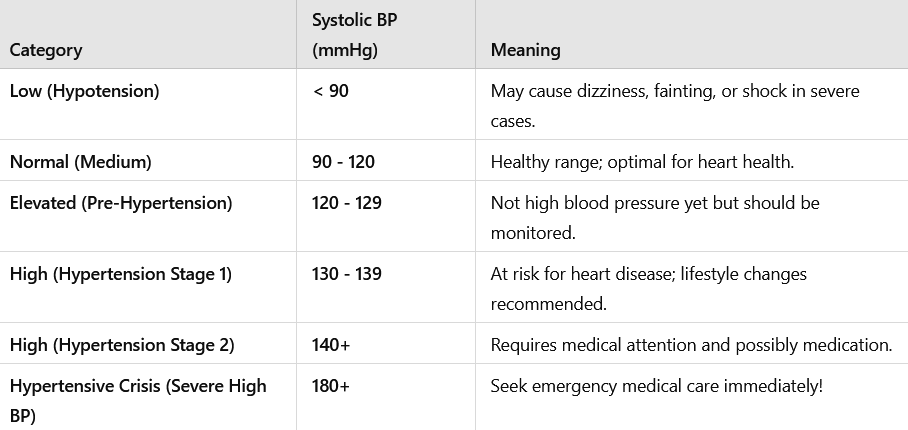

In [51]:
data['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [52]:
data.shape

(918, 14)

In [53]:
Resting_BP_Thes = []


for i in data['RestingBP']:
    if 0 > i < 20:
        Resting_BP_Thes.append('Low')
    elif 20 > i < 30:
        Resting_BP_Thes.append('Low')
    elif 30 > i < 40:
        Resting_BP_Thes.append('Low')
    elif 40 > i < 50:
        Resting_BP_Thes.append('Low')
    elif 50 > i < 60:
        Resting_BP_Thes.append('Low')
    elif 60 > i < 70:
        Resting_BP_Thes.append('Low')
    elif 70 > i < 80:
        Resting_BP_Thes.append('Low')
    elif 80 > i < 90:
        Resting_BP_Thes.append('Low')
    elif 90 > i < 100:
        Resting_BP_Thes.append('Normal')
    elif 100 > i < 120:
        Resting_BP_Thes.append('Normal')
    elif 120 > i < 130:
        Resting_BP_Thes.append('Normal')
    elif 130 > i < 140:
        Resting_BP_Thes.append('Elevated')
    elif 140 > i < 150:
        Resting_BP_Thes.append('High')
    elif 150 > i < 160:
        Resting_BP_Thes.append('High')
    elif 160 > i < 170:
        Resting_BP_Thes.append('High')
    elif 170 > i < 180:
        Resting_BP_Thes.append('High_2')
    elif 180 > i < 190:
        Resting_BP_Thes.append('High_2')
    elif 190 > i < 200: 
        Resting_BP_Thes.append('High_Crisis')
    elif 200 > i < 220:
        Resting_BP_Thes.append('High_Crisis')
    elif 220 > i < 230:
        Resting_BP_Thes.append('High_Crisis')
    elif 230 > i < 240:
        Resting_BP_Thes.append('High_Crisis')
    elif 240 > i < 250:
        Resting_BP_Thes.append('High_Crisis')

        


In [54]:
len(Resting_BP_Thes)

918

In [55]:
data['RestingBP'].shape

(918,)

In [56]:
data['Resting_BP_THes'] = Resting_BP_Thes

In [57]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bins,Chest_pain_Encoded,Resting_BP_THes
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,31-40,2,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50,1,High_2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,31-40,2,High
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50,0,High
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60,1,High


In [58]:
data['Resting_BP_THes'].value_counts()

High           450
Elevated       214
Normal         160
High_2          73
High_Crisis     20
Low              1
Name: Resting_BP_THes, dtype: int64

In [59]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

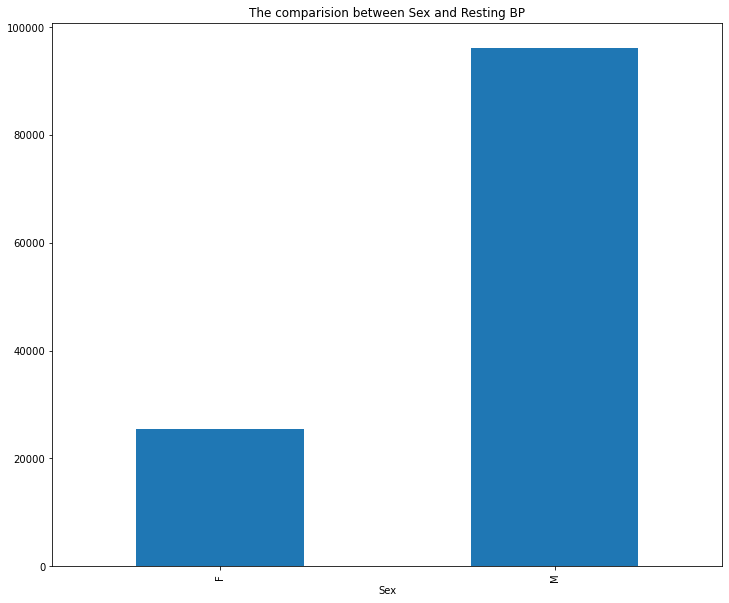

In [60]:
plt.figure(figsize=(12,10))
data.groupby('Sex')['RestingBP'].sum().plot.bar()
plt.title('The comparision between Sex and Resting BP')
plt.show()

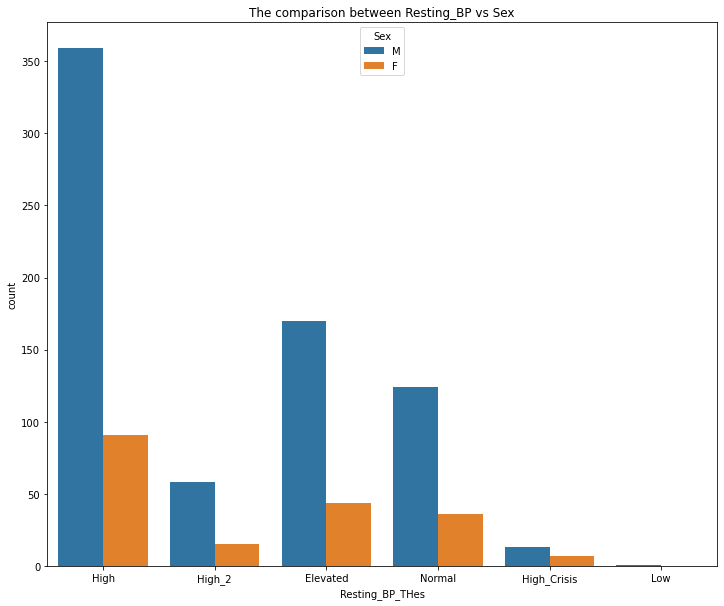

In [61]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='Resting_BP_THes',hue='Sex')
plt.title('The comparison between Resting_BP vs Sex')
plt.show()

It is clear that the men suffers lot while comparing the data with woman

In [62]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [63]:
### Lets compare the resting bp thes with the Outcome 

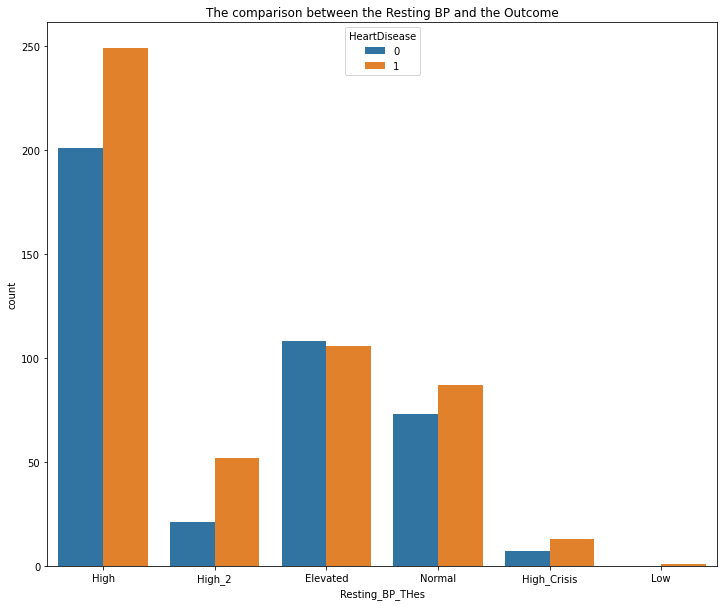

In [64]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='Resting_BP_THes',hue='HeartDisease')
plt.title('The comparison between the Resting BP and the Outcome')
plt.show()

In [65]:
data['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

serum cholesterol refers to the total amount of cholesterol in your blood, including LDL (bad cholesterol), HDL (good cholesterol), and a portion of triglycerides. It is an important indicator of cardiovascular health.

In [66]:
data['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

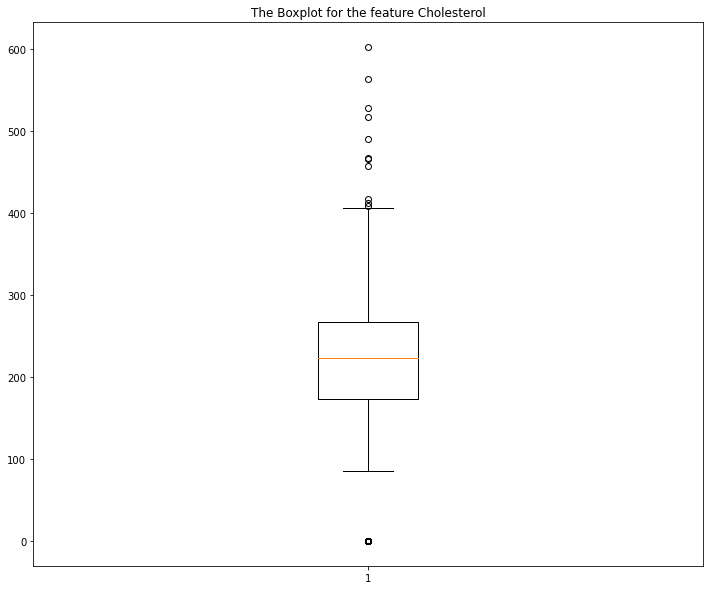

In [67]:
### Lets see any outliers are present in the cholesterol 
plt.figure(figsize=(12,10))
plt.boxplot(data=data,x='Cholesterol')
plt.title('The Boxplot for the feature Cholesterol')
plt.show()

In [68]:
data['Cholesterol'].quantile(0.25)

173.25

In [69]:
data['Cholesterol'].quantile(0.75)

267.0

In [70]:
q1 = data.quantile(0.25)

In [71]:
q3 = data.quantile(0.75)

In [72]:
iqr = q3 - q1 

In [73]:
iqr

Age             13.00
RestingBP       20.00
Cholesterol     93.75
FastingBS        0.00
MaxHR           36.00
Oldpeak          1.50
HeartDisease     1.00
dtype: float64

In [74]:
### Defing the upper bound and lower bound 

In [75]:
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr

In [76]:
lower_bound

Age             27.500
RestingBP       90.000
Cholesterol     32.625
FastingBS        0.000
MaxHR           66.000
Oldpeak         -2.250
HeartDisease    -1.500
dtype: float64

In [77]:
upper_bound

Age              79.500
RestingBP       170.000
Cholesterol     407.625
FastingBS         0.000
MaxHR           210.000
Oldpeak           3.750
HeartDisease      2.500
dtype: float64

In [78]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [79]:
data.dtypes

Age                      int64
Sex                     object
ChestPainType           object
RestingBP                int64
Cholesterol              int64
FastingBS                int64
RestingECG              object
MaxHR                    int64
ExerciseAngina          object
Oldpeak                float64
ST_Slope                object
HeartDisease             int64
Age_bins              category
Chest_pain_Encoded      object
Resting_BP_THes         object
dtype: object

In [80]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [81]:
## The cholesterol feature has lot of outliers but lets focus on other features and lets come back 

## But here we have classification so we can use random forest and decision tree algorithms that has less effect in outliers 

In [82]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [83]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [84]:
## Lets compare sex and Fasting BS 

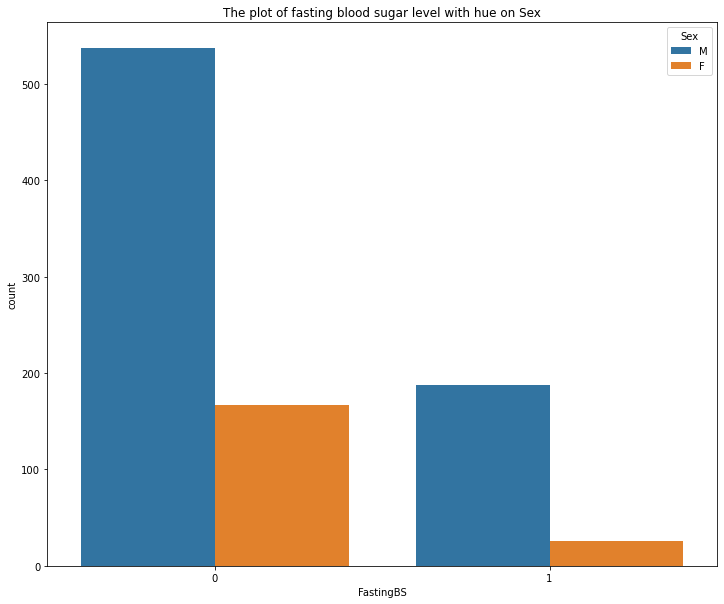

In [85]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='FastingBS',hue='Sex')
plt.title('The plot of fasting blood sugar level with hue on Sex')
plt.show()

In [86]:
### lets compare fasting bs and outcome 

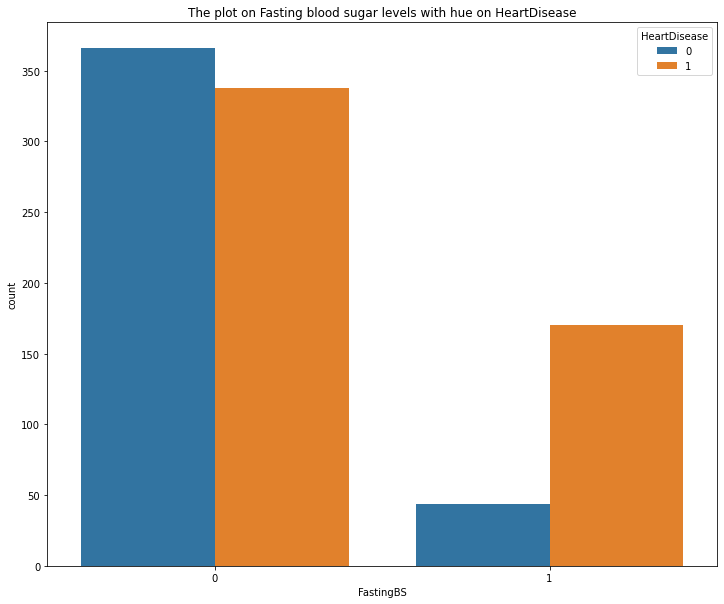

In [87]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='FastingBS',hue='HeartDisease')
plt.title('The plot on Fasting blood sugar levels with hue on HeartDisease')
plt.show()

In [88]:
### Fasting may not influence the heart disease 

In [89]:
## lets check it again with the correlation plot 

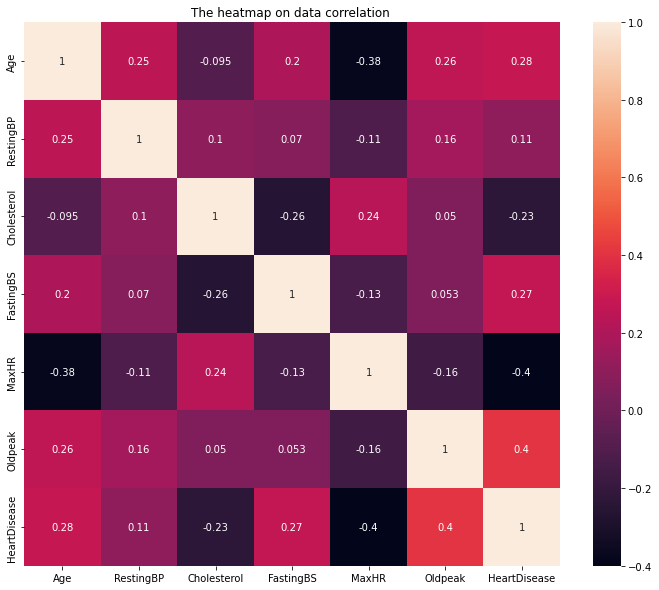

In [90]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.title('The heatmap on data correlation ')
plt.show()

In [91]:
data.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [92]:
data['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

The Oldpeak value represents the magnitude of ST depression (in millimeters) observed during an exercise stress test compared to rest. It’s a useful indicator of myocardial ischemia. Although the exact cutoff values can vary depending on the clinical context, a common way to categorize Oldpeak values is:

    Low: ~0.0 to 0.9 mm
    • Indicates little to no ST depression and a lower likelihood of ischemia.
    Medium: ~1.0 to 1.9 mm
    • Suggests moderate ST depression, which may be associated with some level of ischemia.
    High: 2.0 mm and above
    • Indicates significant ST depression; higher values like these are more strongly associated with myocardial ischemia and an increased risk of heart disease.

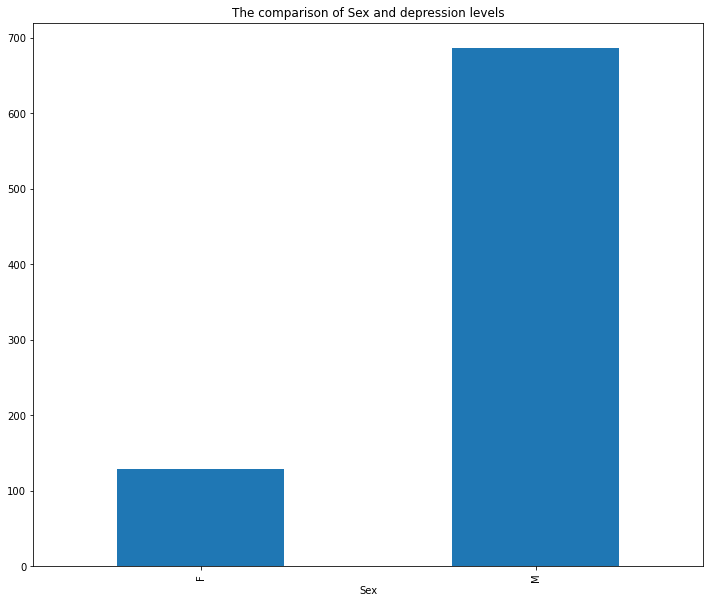

In [93]:
plt.figure(figsize=(12,10))
data.groupby('Sex')['Oldpeak'].sum().plot.bar()
plt.title('The comparison of Sex and depression levels')
plt.show()

In [94]:
### Lets have a comparison plot with sex, outcome and stress levels 


<AxesSubplot:xlabel='Sex,HeartDisease'>

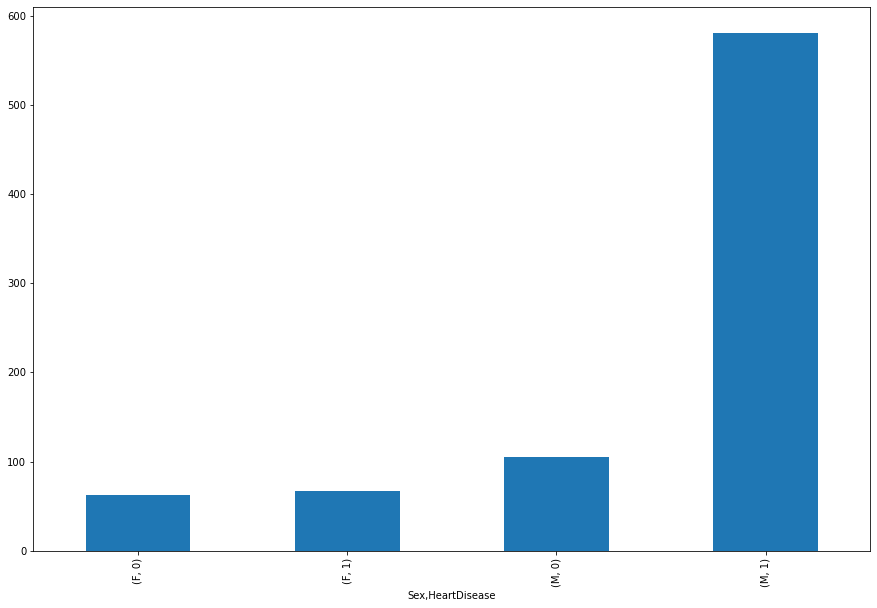

In [95]:
data.groupby(['Sex','HeartDisease'])['Oldpeak'].sum().plot.bar()

In [96]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [97]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [98]:
### Lrts dig in 

In [99]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [100]:
### SEX vs RestingECG

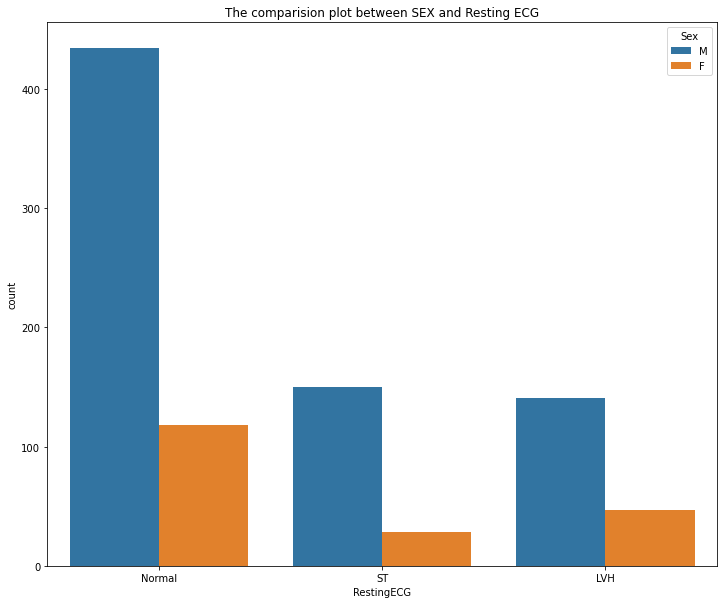

In [101]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='RestingECG',hue='Sex')
plt.title('The comparision plot between SEX and Resting ECG')
plt.show()

In [102]:
### Lets compare it with outcome feature HeartDisease 

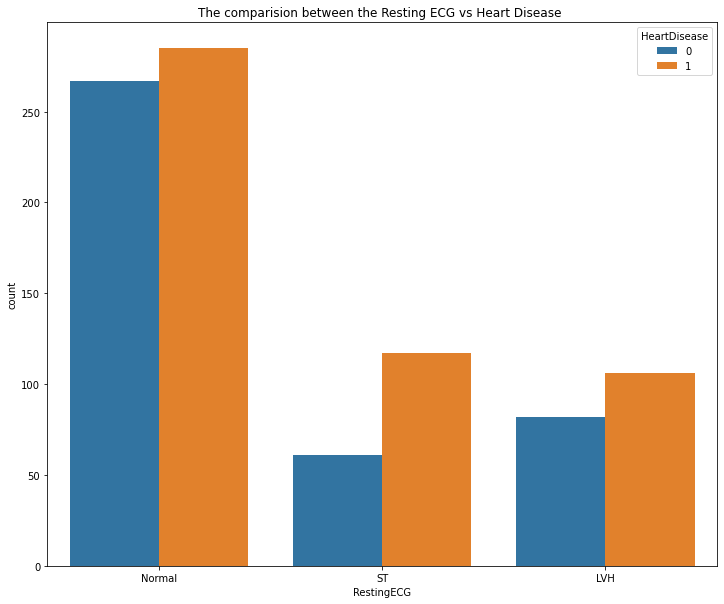

In [103]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='RestingECG',hue='HeartDisease')
plt.title('The comparision between the Resting ECG vs Heart Disease ')
plt.show()

In [104]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [105]:
### since the normal level of resting BP huge in numbers here we see the less relationship with the outcome 

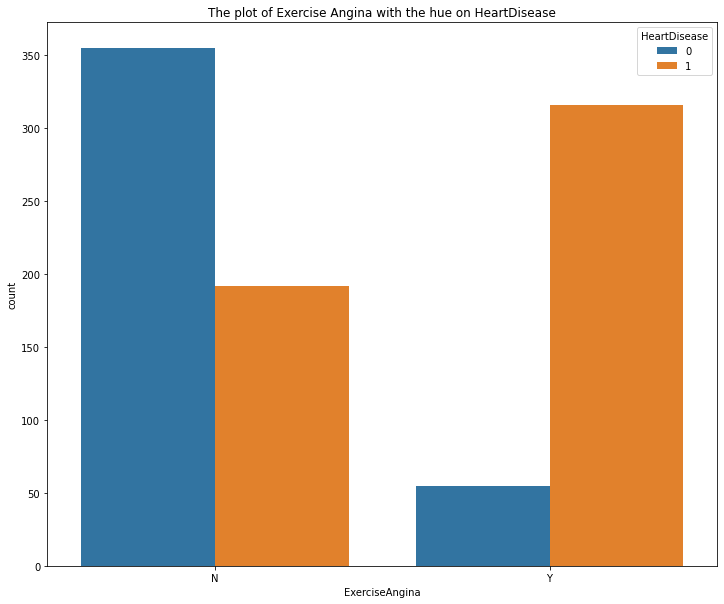

In [106]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='ExerciseAngina', hue = 'HeartDisease')
plt.title('The plot of Exercise Angina with the hue on HeartDisease')
plt.show()

In [107]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [108]:
### Exercise Angina is not a vital factor for the heart disease 

In [109]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [110]:
### Lets compare the outcome with the ST Slope values 

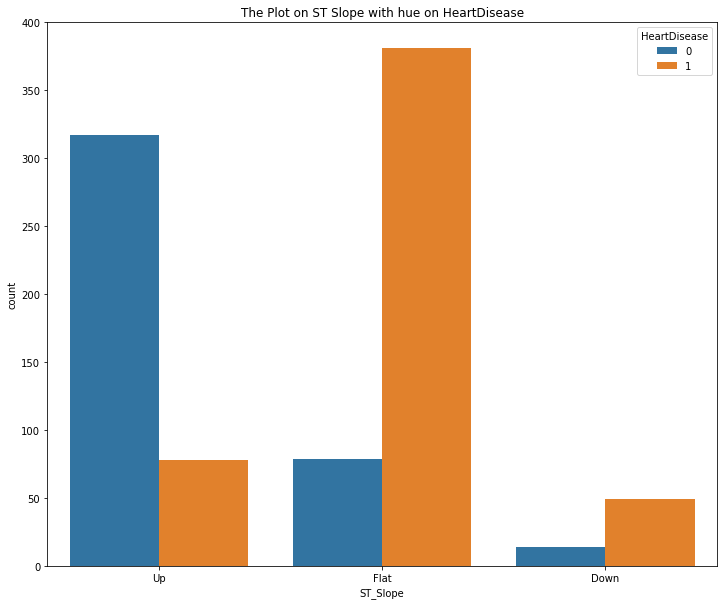

In [111]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='ST_Slope',hue='HeartDisease')
plt.title('The Plot on ST Slope with hue on HeartDisease')
plt.show()

In [112]:
### We can clearly see that the flat st slope values are very high with comparing the outcome

In [113]:
print('The End of Analytics ')

The End of Analytics 


In [114]:
#### data

In [115]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bins,Chest_pain_Encoded,Resting_BP_THes
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,31-40,2,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50,1,High_2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,31-40,2,High
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50,0,High
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60,1,High


In [116]:
### Lets remove few columns here 

In [117]:
data.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Chest_pain_Encoded', 'Resting_BP_THes'],
      dtype='object')

In [118]:
data.drop(columns=['Age_bins','Chest_pain_Encoded','Resting_BP_THes'],axis=1,inplace=True)

In [119]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [120]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [121]:
numerical_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [122]:
### Outlier treatment 

In [123]:
### Note 1

In [124]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [125]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [126]:
data[categorical_columns]

,ChestPainType,ExerciseAngina,ST_Slope,Sex,RestingECG
0,ATA,N,Up,M,Normal
1,NAP,N,Flat,F,Normal
2,ATA,N,Up,M,ST
3,ASY,Y,Flat,F,Normal
4,NAP,N,Up,M,Normal
...,...,...,...,...,...
913,TA,N,Flat,M,Normal
914,ASY,N,Flat,M,Normal
915,ASY,Y,Flat,M,Normal
916,ATA,N,Flat,F,LVH


In [127]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
lab = LabelEncoder()

In [130]:
data['Sex'] = lab.fit_transform(data['Sex'])

In [131]:
data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [132]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [133]:
data['ChestPainType'] = lab.fit_transform(data['ChestPainType'])

In [134]:
data['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [135]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,0,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0


In [136]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [137]:
data['RestingECG'] = lab.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = lab.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = lab.fit_transform(data['ST_Slope'])

In [138]:
data['RestingECG'].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [139]:
data['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

In [140]:
data['ST_Slope'].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [141]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [142]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


###### Modelling the data

#### Decision tree

In [143]:
## Entropy 

In [144]:
from sklearn.tree import DecisionTreeClassifier 

Tree_with_entropy = DecisionTreeClassifier(criterion='entropy',
                                          max_depth=5,
                                          min_samples_leaf=5,
                                          min_samples_split=10,
                                          random_state=42)

In [145]:
### Lets split the data into train test 

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X = data.drop('HeartDisease',axis=1)

In [148]:
y = data['HeartDisease']

In [149]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

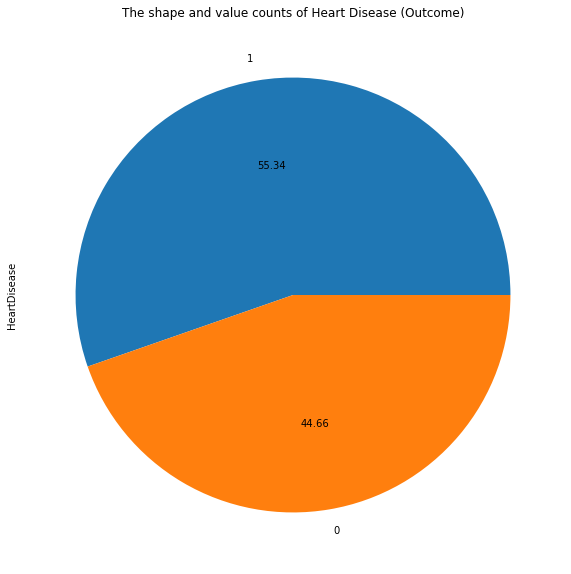

In [150]:
plt.figure(figsize=(12,10))
data['HeartDisease'].value_counts().plot.pie(autopct='%.2f')
plt.title('The shape and value counts of Heart Disease (Outcome)')
plt.show()


In [151]:
### There is no imbalance data found in heart disease column

In [152]:
### Lets split the data

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [154]:
### Lets see the shape of the data 

In [155]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


In [156]:
Tree_with_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [157]:
Tree_with_Entropy_Train_Prediction = Tree_with_entropy.predict(x_train)
Tree_with_entropy_Test_Prediction = Tree_with_entropy.predict(x_test)

In [158]:
### Lets evaluate the model's performance with accuracy score , f1 score, classification report and confusion matrix 

In [159]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

In [160]:
print('*'*100)
print(' '*100)

print('This is the accuracy score of tree_with_entropy as criterion for the training data ',accuracy_score(Tree_with_Entropy_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)

print('This is the accuracy score of tree_with_entropy as criterion for the test data ',accuracy_score(Tree_with_entropy_Test_Prediction,y_test))
print('*'*100)
print(' '*100)
print(' '*100)

print('This is the f1_score of tree_with_entropy as criterion for training data : ',f1_score(Tree_with_Entropy_Train_Prediction,y_train))

print('*'*100)
print(' '*100)
print(' '*100)

print('This is the f1_score of tree_with_entropy as criterion for test data : ',f1_score(Tree_with_entropy_Test_Prediction,y_test))
print('*'*100)
print(' '*100)
print(' '*100)

print('This is the classification report of tree_with_entropy as criterion for training data ', classification_report(Tree_with_Entropy_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the classification report of tree_with_entropy as criterion for test data: ',classification_report(Tree_with_entropy_Test_Prediction,y_test))

print('*'*100)
print(' '*100)
print(' '*100)

print('This is the confusion matrix of tree_with_entropy as criterion for training data : ',confusion_matrix(Tree_with_Entropy_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the confusion matrix of tree_with_entropy as criterion for test data : ' ,confusion_matrix(Tree_with_entropy_Test_Prediction,y_test))

****************************************************************************************************
                                                                                                    
This is the accuracy score of tree_with_entropy as criterion for the training data  0.8828337874659401
****************************************************************************************************
                                                                                                    
                                                                                                    
This is the accuracy score of tree_with_entropy as criterion for the test data  0.875
****************************************************************************************************
                                                                                                    
                                                                                                    
Thi

In [161]:
### GINI 

In [162]:
from sklearn.tree import DecisionTreeClassifier 

Tree_with_Gini  = DecisionTreeClassifier(criterion='gini',
                                          max_depth=5,
                                          min_samples_leaf=5,
                                          min_samples_split=10,
                                          random_state=42)

In [163]:
Tree_with_Gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [164]:
Tree_with_Gini_Train_Prediction = Tree_with_Gini.predict(x_train)
Tree_with_Gini_Test_Prediction = Tree_with_Gini.predict(x_test)

In [165]:
print('*'*100)
print(' '*100)
print(' '*100)

print('This is the accuracy score of gini as criterion on training data: ',accuracy_score(Tree_with_Gini_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the accuracy score of gini as criterion on test data : ',accuracy_score(Tree_with_Gini_Test_Prediction,y_test))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the classification report of gini as criterion on training data: ',classification_report(Tree_with_Gini_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the classification report of gini as criterion on test data: ',classification_report(Tree_with_Gini_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the f1 score of gini as criterion on training data: ',f1_score(Tree_with_Gini_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the f1 score of gini as criterion on test data : ',f1_score(Tree_with_entropy_Test_Prediction,y_test))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the confusion matrix of gini as criterion on training data : ',confusion_matrix(Tree_with_Gini_Train_Prediction,y_train))
print('*'*100)
print(' '*100)
print(' '*100)
print('This is the confusion matrix of gini as criterion on test data: ',confusion_matrix(Tree_with_Gini_Test_Prediction,y_test))

****************************************************************************************************
                                                                                                    
                                                                                                    
This is the accuracy score of gini as criterion on training data:  0.885558583106267
****************************************************************************************************
                                                                                                    
                                                                                                    
This is the accuracy score of gini as criterion on test data :  0.8804347826086957
****************************************************************************************************
                                                                                                    
                        

##### Random Forest 

In [166]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=42)

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grids = {'n_estimators':[100,200,300,400,500],
              'max_depth':[10,20,30,40,None],
              'min_samples_split':[2,5,6],
              'min_samples_leaf':[1,2,4],
              'max_features':['sqrt','log2'],
              'class_weight':['balanced',None]}

In [169]:
grid_search = GridSearchCV(estimator=random,
                          param_grid=param_grids,
                          cv=5,
                          scoring='f1',
                          n_jobs=1,
                          verbose=2)

In [170]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_l

[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s

[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s

[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.8s

[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s

[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s

[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s

[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s

[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s

[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s

[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s

[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s

[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s

[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s

[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s

[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   0.9s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s

[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s

[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s

[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; tota

[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; tota

[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; tota

[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; tota

[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; tota

[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; tota

[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.7s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.8s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END clas

[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=2)

In [171]:
### Prediction part 
random_forest_prediction_on_train = grid_search.best_estimator_.predict(x_train)
random_forest_prediction_on_test = grid_search.best_estimator_.predict(x_test)

In [172]:
### Lets evaluate the model's performance 

In [173]:
print('This is the accuracy score of random_forest on training data: ',accuracy_score(random_forest_prediction_on_train,y_train))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the accuracy score of random_forest on test data: ',accuracy_score(random_forest_prediction_on_test,y_test))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the f1 score of random_forest on training data: ',f1_score(random_forest_prediction_on_train,y_train))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the f1 score of random_forest on test data : ',f1_score(random_forest_prediction_on_test,y_test))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the classification report on training data: ',classification_report(random_forest_prediction_on_train,y_train))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the classification report on test data: ',classification_report(random_forest_prediction_on_test,y_test))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the confusion matrix on training data: ',confusion_matrix(random_forest_prediction_on_train,y_train))
print('*'*200)
print(' '*200)
print(' '*200)
print('This is the confusion matrix on test data : ',confusion_matrix(random_forest_prediction_on_test,y_test))

This is the accuracy score of random_forest on training data:  0.9754768392370572
********************************************************************************************************************************************************************************************************
                                                                                                                                                                                                        
                                                                                                                                                                                                        
This is the accuracy score of random_forest on test data:  0.8858695652173914
********************************************************************************************************************************************************************************************************
                                    

##### Light GBM Classifier 

##### Light Gradient Boosting Machine Learning 

In [174]:
!pip install lightgbm


In [175]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [178]:
lgb_model = lgb.LGBMClassifier()

In [179]:
param_grid = {
    'num_leaves': [20, 31, 40],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7]  
}

In [181]:
grid_search_1 = GridSearchCV(estimator=lgb_model,
                            param_grid=param_grid,
                            scoring='f1',
                            cv=5,
                            n_jobs=-1)

grid_search_1.fit(x_train,y_train)


[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [20, 31, 40]},
             scoring='f1')

In [183]:
grid_search_1.estimator.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

In [184]:
lgbm_train_predition = grid_search_1.estimator.predict(x_train)
lgbm_test_prediction = grid_search_1.estimator.predict(x_test)

##### Lets evaluate the light gradient boosting machine learning algorithm 

In [185]:
print('*'*150)
print(' '*300)
print('*'*150)
print('The accuracy score of LGBM on training data : ',accuracy_score(lgbm_train_predition,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The accuracy score of LGBM on test data: ',accuracy_score(lgbm_test_prediction,y_test))
print('*'*150)
print(' '*300)
print('*'*150)
print('The f1score of LGBM on training data : ',f1_score(lgbm_train_predition,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The f1score of LGBM on test data : ',f1_score(lgbm_test_prediction,y_test))
print('*'*150)
print(' '*300)
print('*'*150)
print('The classification report on Training data ',classification_report(lgbm_train_predition,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The classification report on test data : ',classification_report(lgbm_test_prediction,y_test))



******************************************************************************************************************************************************
                                                                                                                                                                                                                                                                                                            
******************************************************************************************************************************************************
The accuracy score of LGBM on training data :  1.0
******************************************************************************************************************************************************
                                                                                                                                                                                                   

In [187]:
!pip install catboost

  Using cached catboost-1.2.7-cp39-cp39-win_amd64.whl (101.8 MB)
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [188]:
import catboost

In [189]:
from catboost import CatBoostClassifier

In [192]:
model = CatBoostClassifier(iterations=5000,
                        learning_rate=0.05,
                          depth=6,
                          loss_function='Logloss',
                          verbose=100)

In [193]:
model.fit(x_train,y_train)

0:	learn: 0.6493474	total: 2.23ms	remaining: 11.1s
100:	learn: 0.1784392	total: 177ms	remaining: 8.58s
200:	learn: 0.1052250	total: 354ms	remaining: 8.46s
300:	learn: 0.0643051	total: 513ms	remaining: 8.01s
400:	learn: 0.0416345	total: 677ms	remaining: 7.77s
500:	learn: 0.0299296	total: 876ms	remaining: 7.87s
600:	learn: 0.0235486	total: 1.09s	remaining: 7.99s
700:	learn: 0.0185062	total: 1.3s	remaining: 7.98s
800:	learn: 0.0149339	total: 1.49s	remaining: 7.83s
900:	learn: 0.0126209	total: 1.67s	remaining: 7.58s
1000:	learn: 0.0112816	total: 1.86s	remaining: 7.44s
1100:	learn: 0.0102387	total: 2.02s	remaining: 7.15s
1200:	learn: 0.0094729	total: 2.22s	remaining: 7.01s
1300:	learn: 0.0090325	total: 2.37s	remaining: 6.75s
1400:	learn: 0.0085223	total: 2.56s	remaining: 6.56s
1500:	learn: 0.0080450	total: 2.73s	remaining: 6.36s
1600:	learn: 0.0075649	total: 2.9s	remaining: 6.16s
1700:	learn: 0.0071968	total: 3.07s	remaining: 5.95s
1800:	learn: 0.0070652	total: 3.22s	remaining: 5.72s
1900:	

In [194]:
### Lets make prediction 

In [195]:
cat_train_prediction = model.predict(x_train)
cat_test_prediction = model.predict(x_test)

##### Lets evaluate the catboost classifier's performance 

In [200]:
print('*'*150)
print(' '*300)
print('*'*150)
print('The accuracy score of catboost on train data: ',accuracy_score(cat_train_prediction,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The accuracy score of catboost on test data : ',accuracy_score(cat_test_prediction,y_test))
print('*'*150)
print(' '*300)
print('*'*150)
print('The f1 score of catboost on training data : ',f1_score(cat_train_prediction,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The f1 score of catboost on test data : ',f1_score(cat_test_prediction,y_test))
print('*'*150)
print(' '*300)
print('*'*150)
print('The classification report on training data : ',classification_report(cat_train_prediction,y_train))
print('*'*150)
print(' '*300)
print('*'*150)
print('The classification report on test data : ',classification_report(cat_test_prediction,y_test))

******************************************************************************************************************************************************
                                                                                                                                                                                                                                                                                                            
******************************************************************************************************************************************************
The accuracy score of catboost on train data:  1.0
******************************************************************************************************************************************************
                                                                                                                                                                                                   